In [1]:
import pandas as pd
import numpy as np

In [2]:
import pylab as pl
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [103]:
df_ = pd.read_csv("contactdbexport.csv")#"SC-List.csv")

In [104]:
df_.columns

Index(['First Name', 'Last Name', 'Email', 'Telephone', 'Company',
       'Contact Category', 'Role', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [105]:
df_ = df_[df_.columns[:7]]
df_.head()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role
0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member
1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member
2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member
3,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Strong Lensing,Affiliate
4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member


In [106]:
df_["Contact Category"].unique()

array(['Transients', 'Solar System', 'Strong Lensing', 'DESC', 'Galaxies',
       'AGN', 'Stars', ' Milky Way and Local Volume',
       'Statistics and Informatics', 'DESC ',
       ' Milky Way and Local Volume ', 'Statistics and Informatics ',
       'Galaxies ', 'Transients '], dtype=object)

In [107]:
df_["Contact Category"] =\
    df_["Contact Category"].apply(lambda x:x.strip())

df_.ix[df_["Contact Category"] == 'Stars', "Contact Category"] = 'Stars, Milky Way, and Local Volume'
df_.ix[df_["Contact Category"] == 
             'Milky Way and Local Volume', "Contact Category"] = 'Stars, Milky Way, and Local Volume'
df_.ix[df_["Contact Category"] == 'Supernovae', "Contact Category"] = "DESC"
df_.ix[df_["Contact Category"] == 'Weak Lensing', "Contact Category"] = "DESC"
df_ = df_[~(
        (df_["Contact Category"] == 'Weak Lensing') | 
             (df_["Contact Category"] == 'Supernovae'))]
df_.describe()

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/Users/fbb/anaconda3/lib/python3.7/site-pack

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role
count,1018,1018,1018,439,113,1018,1018
unique,569,813,855,322,73,8,2
top,Michael,Ivezic,ivezic@uw.edu,206-543-9487,University of Washington,"Stars, Milky Way, and Local Volume",Member
freq,28,9,9,10,9,265,921


In [108]:
df_["SC"] = df_["Contact Category"].apply(lambda x : 
                                         x.strip().lstrip())
df_.head()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,SC
0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member,Transients
1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member,Solar System
2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,Transients
3,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Strong Lensing,Affiliate,Strong Lensing
4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member,DESC


In [109]:
df_[["Email", "SC"]].drop_duplicates().groupby("SC").count()

,Email
SC,
AGN,54
DESC,169
Galaxies,106
Solar System,94
"Stars, Milky Way, and Local Volume",237
Statistics and Informatics,70
Strong Lensing,43
Transients,194


In [110]:
df_[["Email", "SC"]].drop_duplicates().groupby("SC").count().reset_index()#.plot(kind="bar")

,SC,Email
0,AGN,54
1,DESC,169
2,Galaxies,106
3,Solar System,94
4,"Stars, Milky Way, and Local Volume",237
5,Statistics and Informatics,70
6,Strong Lensing,43
7,Transients,194


In [111]:
df_

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,SC
0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member,Transients
1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member,Solar System
2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,Transients
3,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Strong Lensing,Affiliate,Strong Lensing
4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member,DESC
5,Marcel,Agueros,marcel@astro.columbia.edu,212-854-6814,Columbia University,Transients,Member,Transients
6,Marcel,Agueros,marcel@astro.columbia.edu,212-854-6814,Columbia University,Strong Lensing,Affiliate,Strong Lensing
7,Mohammad,Akhlaghi,mohammad@akhlaghi.org,NaN,IAC,Galaxies,Member,Galaxies
8,Greg,Aldering,galdering@lbl.gov,510-495-2203,University of California,DESC,Member,DESC
9,Mark,Allen,mallen@slac.stanford.edu,NaN,Berkeley/ LBNL,Strong Lensing,Affiliate,Strong Lensing


In [112]:
df_.drop_duplicates(subset=["First Name", "Last Name"], inplace=True)

In [113]:
newnames = {"DESC":"Dark Energy (DESC)",
           "Milky Way and Local Volume":"Stars, Milky Way, Local Volume",
           "Statistics and Informatics":"Informatics and Statistics",
           "Transients": "Transients and Variable Stars"}



In [114]:
df_tvs = pd.read_csv("LSST_TVS_subgroups - main.csv")#"SC-List.csv")
df_tvs.rename({"last name":"Last Name",
               "first name":"First Name",
               "affiliation": "Company",
               "email": "Email"}, axis=1, inplace=True)
df_tvs["SC"] = "Transients"

df_tvs.head()

,Last Name,First Name,Company,continent,Email,signed CoC,Unnamed: 6,primary,secondary,secondary.1,secondary.2,Unnamed: 11,Unnamed: 12,date added,added by,SC
0,Ackley,Kendall,Monash University,AU,kendall.ackley@monash.edu,kendall.ackley@monash.edu,True,Multiwavelength Characterization/Counterparts,Classification/Characterization,Fast transients,NaN,NaN,NaN,NaN,NaN,Transients
1,Agol,Eric,University of Washington,US,agol@astro.washington.edu,agol@astro.washington.edu,True,Microlensing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transients
2,Aleo,Patrick,University of Illinois at Urbana-Champaign,US,paleo2@illinois.edu,paleo2@illinois.edu,True,Supernovae,Classification/Characterization,Fast Transients,Pulsating Variables,NaN,NaN,NaN,NaN,Transients
3,Alonso-Garcia,Javier,NaN,CL,javier.alonso@uantof.cl,javier.alonso@uantof.cl,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transients
4,Anderson,Scott,University of Washington,US,anderson@astro.washington.edu,anderson@astro.washington.edu,True,NaN,Multiwavelength Characterization/Counterparts,Tidal Disruption Events,Interacting Binaries,NaN,NaN,NaN,NaN,Transients


In [115]:
tmp = df_tvs.merge(df_, on=["First Name", "Last Name"], indicator=True)
(tmp["_merge"] == "both").sum(), (tmp["_merge"] != "both").sum()
tmp.head()

,Last Name,First Name,Company_x,continent,Email_x,signed CoC,Unnamed: 6,primary,secondary,secondary.1,...,date added,added by,SC_x,Email_y,Telephone,Company_y,Contact Category,Role,SC_y,_merge
0,Agol,Eric,University of Washington,US,agol@astro.washington.edu,agol@astro.washington.edu,True,Microlensing,NaN,NaN,...,NaN,NaN,Transients,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,Transients,both
1,Alonso-Garcia,Javier,NaN,CL,javier.alonso@uantof.cl,javier.alonso@uantof.cl,True,NaN,NaN,NaN,...,NaN,NaN,Transients,javier.alonso@uantof.cl,(+56)-55-2637596,University of Oxford,Transients,Member,Transients,both
2,Anderson,Scott,University of Washington,US,anderson@astro.washington.edu,anderson@astro.washington.edu,True,NaN,Multiwavelength Characterization/Counterparts,Tidal Disruption Events,...,NaN,NaN,Transients,anderson@astro.washington.edu,206-685-2392,University of California,Statistics and Informatics,Member,Statistics and Informatics,both
3,Antoniucci,Simone,INAF - Osservatorio Astronomico di Roma,EU,simone.antoniucci@inaf.it,simone.antoniucci@inaf.it,True,Non-degenerate Eruptive Variables,Classification/Characterization,NaN,...,NaN,NaN,Transients,simone.antoniucci@oa-roma.inaf.it,NaN,Univ. Paris-Sud & LAL - IN2P3/CNRS,DESC,Member,DESC,both
4,Arcavi,Iair,LCOGT/UCSB,US,arcavi@gmail.com,arcavi@gmail.com,True,Tidal Disruption Events,Tidal Disruption Events,Supernovae,...,NaN,NaN,Transients,arcavi@gmail.com,NaN,INAF-Osservatorio Astronomico di Roma,Galaxies,Member,Galaxies,both


In [116]:
df_tmp = pd.concat([df_tvs, df_])


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [118]:
df_tmp.drop_duplicates(["Last Name","First Name"], inplace=True)

In [119]:
df_.describe()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,SC
count,859,859,859,326,97,859,859,859
unique,569,813,855,322,66,8,2,8
top,David,Smith,krughoff@lsst.org,814-865-3509,University of Washington,"Stars, Milky Way, and Local Volume",Member,"Stars, Milky Way, and Local Volume"
freq,20,6,2,3,7,220,825,220


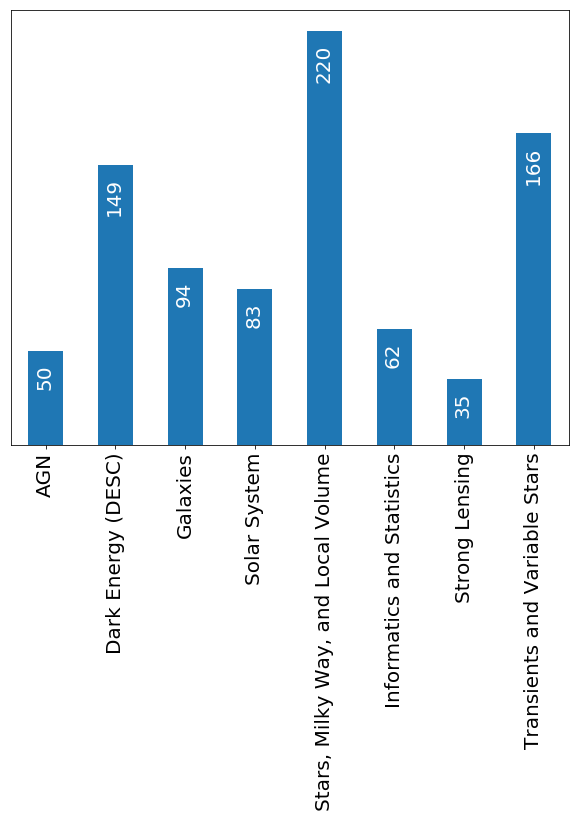

In [120]:

tmp = df_[["Email", "SC"]].drop_duplicates().groupby("SC").count().rename(newnames)
ax = tmp.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              )

ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 + -0.15, b.y1 + -15), rotation=90, color="w", fontsize=20)
ax.set_xlabel("")
pl.savefig("SCbars.png")

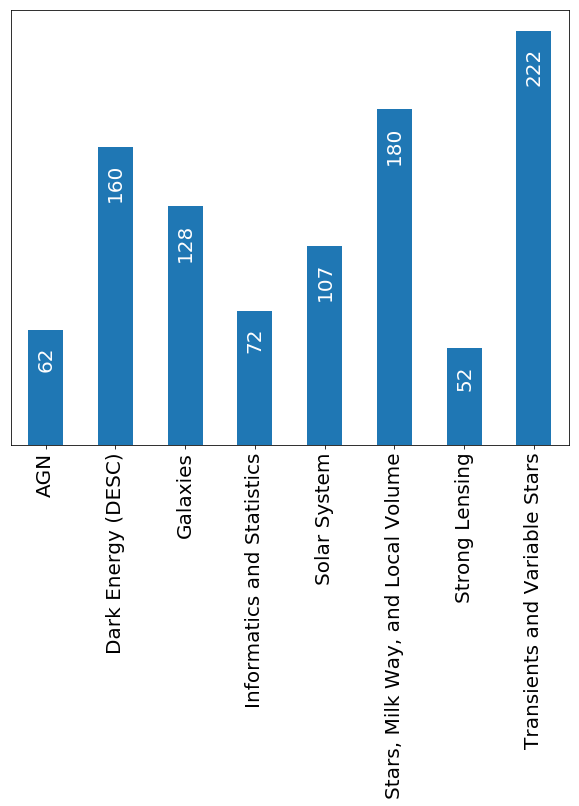

In [123]:
sccounts = pd.DataFrame.from_dict(
    {"AGN": 62,
    "Dark Energy (DESC)": 160,
     "Galaxies": 128,
   "Informatics and Statistics": 72,
      "Solar System": 107,
   "Stars, Milk Way, and Local Volume": 180,
     "Strong Lensing": 52,
  "Transients and Variable Stars": 222, }, orient="index")

ax = sccounts.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              )

ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 - 0.13, b.y1 + -17), rotation=90, color="w", fontsize=20)
ax.set_xlabel("")
pl.savefig("SCbars.png")

In [124]:
tvsdf = pd.read_csv("LSST_TVS_subgroups - Sheet1.csv")[
    ["last name","first name","affiliation","email"]].rename(
    {"first name":"First Name",
    "last name":"Last Name",
    "email":"Email",
    "affiliation":"SC"}, axis=1)
tvsdf["SC"] = ["TVS"] * len(tvsdf)
tvsmerged = pd.concat([tvsdf,df_[["First Name",
    "Last Name",
    "Email",
    "SC"]]]).drop_duplicates()


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [125]:
pd.set_option('display.max_rows', 1000)
tmp = tvsmerged[(tvsmerged["SC"] == "TVS") + 
          (tvsmerged["SC"] == "Transients")].drop_duplicates(
    subset=["Email"])
tmp = tmp.drop_duplicates(
    subset=["First Name", "Last Name"])
tmp[tmp["SC"] == "Transients"]
#tvsdf.shape

/Users/fbb/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,Email,First Name,Last Name,SC
0,abdulla1@llnl.gov,Ghaleb,Abdulla,Transients
5,marcel@astro.columbia.edu,Marcel,Agueros,Transients
23,manuel.aravenaa@mail.udp.cl,Manuel,Aravena,Transients
25,david.ardila@jpl.nasa.gov,David,Ardila,Transients
30,pierre.astier@in2p3.fr,Pierre,Astier,Transients
41,david.ballantyne@physics.gatech.edu,David,Ballantyne,Transients
44,eabaltz@slac.stanford.edu,Ted,Baltz,Transients
61,kbechtol@lsst.org,Keith,Bechtol,Transients
67,ericbell@umich.edu,Eric,Bell,Transients
81,blanc@lal.in2p3.fr,Guillaume,Blanc,Transients


In [126]:
tmp[tmp["SC"] == "Transients"]


,Email,First Name,Last Name,SC
0,abdulla1@llnl.gov,Ghaleb,Abdulla,Transients
5,marcel@astro.columbia.edu,Marcel,Agueros,Transients
23,manuel.aravenaa@mail.udp.cl,Manuel,Aravena,Transients
25,david.ardila@jpl.nasa.gov,David,Ardila,Transients
30,pierre.astier@in2p3.fr,Pierre,Astier,Transients
41,david.ballantyne@physics.gatech.edu,David,Ballantyne,Transients
44,eabaltz@slac.stanford.edu,Ted,Baltz,Transients
61,kbechtol@lsst.org,Keith,Bechtol,Transients
67,ericbell@umich.edu,Eric,Bell,Transients
81,blanc@lal.in2p3.fr,Guillaume,Blanc,Transients


In [127]:
df_.Company.unique()

array(['Lawrence Livermore National Laboratory',
       'NASA Johnson Space Center', 'University of Washington', nan,
       'Columbia University', 'IAC', 'University of California',
       ' Berkeley/ LBNL',
       'Kavli Institute for Particle Astrophysics and Cosmology (KIPAC)',
       'SLAC National Accelerator Laboratory',
       'University of Southampton', 'University of Oxford',
       'Universidad de Antofagasta', 'Universidad Andres Bello',
       'Univ. Paris-Sud & LAL - IN2P3/CNRS', 'IN2P3-LPNHE',
       'INAF-Osservatorio Astronomico di Roma',
       'Universidad Diego Portales', 'LCOGT & UC Santa Barbara',
       'Jet Propulsion Laboratory', 'IPAC/Caltech',
       'The University of Arizona', 'University of Chicago', 'Rutgers',
       'Laboratory for Atmosphere and Space Physics University of Colorado at Boulder',
       'Pennsylvania State University',
       'Lawrence Berkeley National Laboratory', 'Yale University',
       'Georgia Institute of Technology',
       'INA

In [128]:
df_state = pd.read_csv("statets.csv", sep="\t", header=None)

In [129]:
df_state.head()

,0,1,2,3
0,AL,Alabama,Montgomery,"December 14, 1819"
1,AK,Alaska,Juneau,"January 3, 1959"
2,AZ,Arizona,Phoenix,"February 14, 1912"
3,AR,Arkansas,Little Rock,"June 15, 1836"
4,CA,California,Sacramento,"September 9, 1850"


In [130]:
df_state.append({0:"DC", 1:"DC"},  ignore_index=True )

,0,1,2,3
0,AL,Alabama,Montgomery,"December 14, 1819"
1,AK,Alaska,Juneau,"January 3, 1959"
2,AZ,Arizona,Phoenix,"February 14, 1912"
3,AR,Arkansas,Little Rock,"June 15, 1836"
4,CA,California,Sacramento,"September 9, 1850"
5,CO,Colorado,Denver,"August 1, 1876"
6,CT,Connecticut,Hartford,"January 9, 1788"
7,DE,Delaware,Dover,"December 7, 1787"
8,FL,Florida,Tallahassee,"March 3, 1845"
9,GA,Georgia,Atlanta,"January 2, 1788"


In [131]:
df_['state'] = df_.Company.apply(lambda x: x if isinstance(x, float)  else x.replace("University of ", ""))
#for state in df_state:
    

In [132]:
df_.state.unique()

array(['Lawrence Livermore National Laboratory',
       'NASA Johnson Space Center', 'Washington', nan,
       'Columbia University', 'IAC', 'California', ' Berkeley/ LBNL',
       'Kavli Institute for Particle Astrophysics and Cosmology (KIPAC)',
       'SLAC National Accelerator Laboratory', 'Southampton', 'Oxford',
       'Universidad de Antofagasta', 'Universidad Andres Bello',
       'Univ. Paris-Sud & LAL - IN2P3/CNRS', 'IN2P3-LPNHE',
       'INAF-Osservatorio Astronomico di Roma',
       'Universidad Diego Portales', 'LCOGT & UC Santa Barbara',
       'Jet Propulsion Laboratory', 'IPAC/Caltech', 'The Arizona',
       'Chicago', 'Rutgers',
       'Laboratory for Atmosphere and Space Physics Colorado at Boulder',
       'Pennsylvania State University',
       'Lawrence Berkeley National Laboratory', 'Yale University',
       'Georgia Institute of Technology',
       'INAF-Osservatorio Astrofisico di Torino & SNS-Scuola Normale',
       'Waterloo', 'Observatório Nacional/BGP-LSST/L

In [133]:
statesdic = {"IAC": "Spain", "Arizona":"Arizona",'Lawrence Livermore National Laboratory': 'California',
       'NASA Johnson Space Center': 'California', 
'Washington':"Washington", 'Columbia University': 'New York',
       'UC Berkeley/LBNL': 'California', 
       'KIPAC Kavli Institute for Particle Astrophysics and Cosmology': 'California', 
       'Oxford':"UK", 'Universidad de Antofagasta':"Chile", ' California Davis': 'California',
       'Universidad Andres Bello':"Chile",
       'Laboratoire de Le Accelerateur Lineaire (LAL)':'France', 'LPNHE':'France',
       'INAF-Osservatorio Astronomico di Roma':"Italy",
       'Universidad Diego Portales':"Chile", 'LCOGT & UC Santa Barbara':"California",
       'Jet Propulsion Lab':"California", 'IPAC Caltech':"California",
       'Lawrence Berkeley National Laboratory':"California", 'APC':"France", ' Chicago':"Illinois",
       'Laboratory for Atmosphere and Space Physics':"Colorado",
       'Colorado at Boulder':"Colorado", 'Pennsylvania State University':"Pennsylvania",
       'Yale University':"Connecticut", 'LPNHE/IN2P3':"France", 'Georgia Institute of Technology':"Georgia",
       'INAF-Osservatorio Astrofisico di Torino & SNS-Scuola Normale':"Italy",
       'Observat\xc3\xb3rio Nacional/BGP-LSST/LIneA':"Chile",
       'Queens University Belfast':"Ireland",
       'Universidad de La Serena':"Chile", 'Universidad de Atacama':"Chile",
       'SLAC Nationatl Acceleratory Laboratory':"California", 'LPSC':"Colorado",
       'Universidad Metropolitana de Ciencias de la Educacion  (UMCE)':"Chile",
       'Pontifilecia Universidad Catolica de Chile':"Chile", ' California Irvine':'California',
       'Booz Allen Hamilton':"DC", 'Pontifica Universidad Catolica de Chile':"Chile",
       'Stanford Univerisity':'California', 'SUNY-SB':"New York", 'Cornell University':"Illinois",
       'Stanford University':'California', 'SLAC National Accelerator Laboratory':'California',
       'Michigan State University':"Michigan", ' Texas at Austin':"Texas", ' Michigan':"Michigan",
       'INAF':"Italy", '  Cambridge':"UK",
       'Harvard Smithsonian Center for Astrophysics':"Massachusetts", ' Pennsylvania':"Pennsylvania",
       'Argonne National Laboratory':"Illinois", 'Liverpool John Moores University':"UK",
       'New York University':"New York", 
       'INAF-Osservatorio Astronomico di Trieste':"Italy", 'Laboratoire de l':"France", 
             "Auburn": "Alabama",
            "B612 Astroid Institute/Washington": "Washington",
            "George Mason University":"Virginia","Rider University":"New Jersey"}

In [134]:
df_['state1'] = df_.state.map(statesdic)

In [135]:
df_[['Email', 'state', 'state1']]

,Email,state,state1
0,abdulla1@llnl.gov,Lawrence Livermore National Laboratory,California
1,paul.a.abell@nasa.gov,NASA Johnson Space Center,California
2,agol@astro.washington.edu,Washington,Washington
4,aguena@if.usp.br,NaN,NaN
5,marcel@astro.columbia.edu,Columbia University,New York
7,mohammad@akhlaghi.org,IAC,Spain
8,galdering@lbl.gov,California,NaN
9,mallen@slac.stanford.edu,Berkeley/ LBNL,NaN
10,swa@stanford.edu,Kavli Institute for Particle Astrophysics and ...,NaN
11,T.R.Almeyda@soton.ac.uk,SLAC National Accelerator Laboratory,California


In [136]:
emcountry={"it":"Italy", "fr":"France", "uk":"UK", "au":"Australia", "br":"Brasil", "cl":"Chile", 
           "nz":"New Zealand","fi":"Finland", "cz":"Czech Republic", "dk":"Damnark","de":"Germany",
          "jp":"Japan", "ca":"Canada", "cn":"China", "dk": "Danmark"}

def statebyEmailEnd(email):
    if not isinstance(email, float):
        if email.split('.')[-1].strip() in emcountry.keys():
            return (emcountry[email.split('.')[-1].strip()])
        else:     return np.nan
    else: return np.nan

In [137]:
df_['state2'] = df_.Email.apply(statebyEmailEnd)

In [138]:
df_[['Email', 'state1', 'state2']]

,Email,state1,state2
0,abdulla1@llnl.gov,California,NaN
1,paul.a.abell@nasa.gov,California,NaN
2,agol@astro.washington.edu,Washington,NaN
4,aguena@if.usp.br,NaN,Brasil
5,marcel@astro.columbia.edu,New York,NaN
7,mohammad@akhlaghi.org,Spain,NaN
8,galdering@lbl.gov,NaN,NaN
9,mallen@slac.stanford.edu,NaN,NaN
10,swa@stanford.edu,NaN,NaN
11,T.R.Almeyda@soton.ac.uk,California,UK


In [139]:
df_[(((df_[['state1']].isnull()).values) * ((df_[['state2']].isnull()).values)).flatten()]

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,SC,state,state1,state2
8,Greg,Aldering,galdering@lbl.gov,510-495-2203,University of California,DESC,Member,DESC,California,NaN,NaN
9,Mark,Allen,mallen@slac.stanford.edu,NaN,Berkeley/ LBNL,Strong Lensing,Affiliate,Strong Lensing,Berkeley/ LBNL,NaN,NaN
10,Steven,Allen,swa@stanford.edu,NaN,Kavli Institute for Particle Astrophysics and ...,DESC,Member,DESC,Kavli Institute for Particle Astrophysics and ...,NaN,NaN
16,Scott,Anderson,anderson@astro.washington.edu,206-685-2392,University of California,Statistics and Informatics,Member,Statistics and Informatics,California,NaN,NaN
27,Lee,Armus,lee@ipac.caltech.edu,626-395-8569,Jet Propulsion Laboratory,"Stars, Milky Way, and Local Volume",Member,"Stars, Milky Way, and Local Volume",Jet Propulsion Laboratory,NaN,NaN
32,Camille,Avestruz,avestruz@uchicago.edu,NaN,IN2P3-LPNHE,DESC,Member,DESC,IN2P3-LPNHE,NaN,NaN
35,Humna,Awan,humna.awan@rutgers.edu,NaN,University of Chicago,Strong Lensing,Member,Strong Lensing,Chicago,NaN,NaN
36,Michael,Aye,michael.aye@lasp.colorado.edu,NaN,University of Chicago,DESC,Member,DESC,Chicago,NaN,NaN
37,Jogesh,Babu,babu@psu.edu,814-863-2837,Rutgers,DESC,Member,DESC,Rutgers,NaN,NaN
38,Stephen,Bailey,StephenBailey@lbl.gov,510-495-2604,Laboratory for Atmosphere and Space Physics Un...,Solar System,Affiliate,Solar System,Laboratory for Atmosphere and Space Physics Co...,NaN,NaN


In [140]:
df_['state3'] = [s[0] if not isinstance(s[0], float) else s[1] for s in zip(df_['state1'], df_['state2'])]

In [141]:
pd.Series([em if  isinstance(em, float) else '.'.join(em.split("@")[-1].split('.')[-2:])
 for em in df_['Email'][np.array([isinstance(v, float) 
                                 for v in df_.state3.values ])].values ]).unique()

array(['lbl.gov', 'stanford.edu', 'washington.edu', 'caltech.edu',
       'uchicago.edu', 'rutgers.edu', 'colorado.edu', 'psu.edu',
       'uci.edu', 'gmu.edu', 'harvard.edu', 'upenn.edu', 'nyu.edu',
       'gmail.com', 'lsst.org', 'ucdavis.edu', 'lcogt.net',
       'princeton.edu', 'nasa.gov', 'sarahbridle.net', 'ttu.edu',
       'uwyo.edu', 'tamu.edu', 'illinois.edu', 'jhu.edu', 'swri.edu',
       'ucsd.edu', 'asu.edu', 'noao.edu', 'yale.edu', 'iac.es',
       'cofc.edu', 'uw.edu', 'cornell.edu', 'arizona.edu', 'nrao.edu',
       'ohio.edu', 'umich.edu', 'lsu.edu', 'berkeley.edu', 'wwu.edu',
       'amherst.edu', 'uvi.edu', 'purdue.edu', 'seti.org', 'unm.edu',
       'edu.pl', 'dawsonresearch.com', 'nku.edu', 'llnl.gov', 'brown.edu',
       'mit.edu', 'hawaii.edu', 'me.com', 'ucsb.edu', 'fnal.gov',
       'carnegiescience.edu', 'stsci.edu', 'navy.mil', 'utexas.edu',
       'utdallas.edu', 'cmu.edu', 'lanl.gov', 'northwestern.edu',
       'umd.edu', 'ou.edu', 'udel.edu', 'ung.si', 'ps

In [142]:
df_.state2.unique(), df_.state3.unique()

(array([nan, 'Brasil', 'UK', 'Chile', 'France', 'Italy', 'Canada',
        'Australia', 'China', 'Germany', 'New Zealand', 'Czech Republic',
        'Finland', 'Danmark'], dtype=object),
 array(['California', 'Washington', 'Brasil', 'New York', 'Spain', nan,
        'UK', 'Chile', 'Italy', 'France', 'Pennsylvania', 'Connecticut',
        'Georgia', 'Ireland', 'DC', 'Michigan', 'New Jersey', 'Virginia',
        'Australia', 'China', 'Germany', 'New Zealand', 'Czech Republic',
        'Finland', 'Canada', 'Danmark'], dtype=object))

In [143]:
stateByEmail = {'ucdavis.edu':"California", 
 'uchicago.edu': "Illinois",
 'psu.edu': "Pennsylvania",
 'stanford.edu':"California",
       'umich.edu': "Michigan",
 'harvard.edu': "Massachusetts",
 'upenn.edu': "Pennsylvania",  
 'osu.edu':"Ohio",
       'berkeley.edu':"California", 
 'noao.edu':"Arizona", 
 'umd.edu':"Maryland", 
 'lcogt.net':"California", 
 'princeton.edu':"New Jersey",
       'asu.edu':"Arizona", 
 'nasa.gov':np.nan, 
 'sarahbridle.net':np.nan, 
 'ttu.edu':"Texas", 
 'uwyo.edu':"Wyoming",
       'tamu.edu':"Texas", 
 'caltech.edu':"California", 
 'illinois.edu':"Illinois", 
 'jhu.edu':"Maryland", 
 'uci.edu':"California",
       'ucsd.edu':"California", 
 'lsst.org':"Washington", 
 'yale.edu':"Connecticut", 
 'cofc.edu':"South Carolina", 
 'uw.edu':"Washington", 
 'cas.cn':np.nan,
       'purdue.edu':"Indiana", 
 'cornell.edu':"Illinois", 
 'arizona.edu':"Arizona", 
 'bnl.gov':"California", 
 'nrao.edu':np.nan,
       'ohio.edu':"Ohio", 
 'wayne.edu':"Michigan", 
 'lsu.edu':"Louisiana", 
 'washington.edu':"Washington", 
 'wwu.edu':"Washington",
       'amherst.edu':"Massachusetts", 
 'columbia.edu':"New York", 
 'uvi.edu':"Virginia", 
 'dawsonresearch.com':"California",
       'aip.de':"Germany", 
 'nku.edu':"Kentucky", 
 'llnl.gov':"California", 
 'brown.edu':"Rhode Island", 
 'hawaii.edu':"Hawaii",
       'me.com':np.nan, 
 'ucsb.edu':"California", 
 'fnal.gov':"Illinois", 
 'carnegiescience.edu':"California",
       'northwestern.edu':"Illinois", 
 'stsci.edu':"DC", 
 'navy.mil':"DC",
 'utexas.edu':"Texas", 
       'cmu.edu':"Pennsylvania", 
 'lanl.gov':"California", 
 'nd.edu':"Delaware", 
 'rutgers.edu':"New Jersey", 
 'ou.edu':"Oklahoma",
       'udel.edu':"Delaware", 
 'ung.si':"Slovenia", 
 'gatech.edu':"Georgia", 
 'ucolick.org':"California", 
 'anl.gov':"Illinois",
       'villanova.edu':"Pennsylvania", 
 'colorado.edu':"Colorado", 
 'adlerplanetarium.org':"Illinois",
       'haverford.edu':"Pennsylvania", 
 'att.net':np.nan, 
 'rice.edu':"Texas", 
 'hws.edu':"Hawaii", 
 'aavso.org':np.nan,
       'gsu.edu':"Georgia", 
 'umkc.edu':"Missouri", 
 'bell-labs.com':"California", 
 'psi.edu':"Pennsylvania",
       'uni-heidelberg.de':"Germany", 
 'utdallas.edu':"Texas", 
 'utah.edu':"Utah", 
 'jarvis.net':np.nan,
       'h-bar.com':np.nan, 
 'aob.rs':np.nan, 
 'virginia.edu':"Virginia", 
 'oswego.edu':"New York", 
 'uwm.edu':"Masachussets",
       'lbl.gov':"California", 
 'iac.es':"Spain", 
 'ac.rs':"Serbia", 
 'albany.edu':"New York", 
 'mac.com':np.nan, 
'usna.edu':"Maryland",
       'yahoo.com':np.nan, 
 'see.com':np.nan, 
 'ufl.edu':"Florida", 
 'icrar.org':"Austrtalia", 
 'gemini.edu':"Chile",
       'nau.edu':"Arizona", 
 'lowell.edu':"Masachussets", 
 'pitt.edu':"Pennsylvania", 
 'gmail.com ':np.nan, 
 'fit.edu':"Florida",
       'longwood.edu':"Virginia", 
 'lehigh.edu':"Pennsylvania", 
 'normalesup.org':"France",
       'missouristate.edu':"Missouri", 
 'columbusstate.edu':"Ohio", 
 'byu.edu':"Utah", 
 'mpg.de':"Germany",
       'usra.edu':"Maryland", 
 'ucr.edu':"California", 
 'ucla.edu':"California", 
 'drexel.edu':"Pennsylvania", 'ucsc.edu':"California",
       'jhuapl.edu':"Maryland", 
 'umn.edu':"Minnesota", 
 'indiana.edu':"Indiana", 
 'ucf.edu':"Florida", 
 'unl.edu':"Nebraska",
       'sdsu.edu':"California", 
 'mtu.edu':"Michigan", 
 'unt.edu':"Texas", 
 'ciw.edu':"California", 
 'apsu.edu':"Tennessee", 
 'uc.edu':"California",
       'gov.pl':"Poland", 
 'lynchburg.edu':"Virginia", 
 'ornl.gov':"Tennessee", 
 'vanderbilt.edu':"Tennessee", 
 'swri.edu':"Coloradu",
       'msu.edu':"Massachusetts", 
 'lco.global':"California", 
 'ipmu.jp':"Japan", 
 'dartmouth.edu':"Hampshire", 
 'nau.edu ':"Arizona",
  'nau.edu':"Arizona",
       'sunysb.edu':"New York", 
 'ubc.ca':"California", 
 'stvincent.edu':"Pennsylvania", 
 'uh.edu':"Texas", 
 'duke.edu':"North Carolina",
                'uiuc.edu':"Illinois",
 'umass.edu':"Massachusetts", 
 'bu.edu':"Massachusetts", 
 'aol.com':np.nan, 
 'Duke.edu':"North Carolina", 
 'nyu.edu':"New York",
 'jpl.nasa.gov':"California", 
 'nao.cas.cn':"China", 
 'aoc.nrao.edu':"Arizona", 
  'seti.org':"California", 
'unm.edu':"New Mexico", 
 'mit.edu': "Massachusetts",
'b612foundation.org':"Washington", 
'aob.rs':"Serbia", 
'astro.rit.edu':"New York", 'nrao.edu':"Arizona",
'gmu.edu':"Virginia",
'mnsu.edu':"Minnesota", 
'oberlin.edu':"Ohio", 
'konkoly.hu':"Hungary", 
'usf.edu':"Florida",
'case.edu':"Ohio"}
     #  'case.edu'
    
def sttatetbyemailend(email):
    if isinstance(email, float): return np.nan
    else: 
        em = '.'.join(email.split("@")[-1].split('.')[-2:])
        if em in stateByEmail.keys():
            return stateByEmail[em]
        else: return np.nan

In [144]:
df_['state4'] = df_.Email.apply(sttatetbyemailend)

In [145]:
df_.state4.describe()

count            499
unique            46
top       California
freq             134
Name: state4, dtype: object

In [146]:
df_['state5'] = [s[0] if not isinstance(s[0], float) else s[1] for s in zip(df_['state3'], df_['state4'])]

In [147]:
df_.state5.describe()

count            750
unique            57
top       California
freq             134
Name: state5, dtype: object

In [148]:
df_[(((df_[['state1']].isnull()).values) * ((df_[['state2']].isnull()).values) * 
     ((df_[['state5']].isnull()).values)).flatten()].Email.apply(lambda x:x.split("@")[1]).unique()

array(['gmail.com', 'jpl.nasa.gov', 'sarahbridle.net', 'nasa.gov',
       'camk.edu.pl', 'me.com', 'att.net', 'aavso.org', 'jarvis.net',
       'h-bar.com', 'astro.rit.edu', 'mac.com', 'yahoo.com', 'see.com',
       'gmail.com ', 'cft.edu.pl', 'stonybrook.edu', 'aol.com',
       'googlemail.com'], dtype=object)

In [149]:
df_.describe()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,SC,state,state1,state2,state3,state4,state5
count,859,859,859,326,97,859,859,859,97,48,249,280,499,750
unique,569,813,855,322,66,8,2,8,66,16,13,25,46,57
top,David,Smith,krughoff@lsst.org,814-865-3509,University of Washington,"Stars, Milky Way, and Local Volume",Member,"Stars, Milky Way, and Local Volume",Washington,Chile,UK,UK,California,California
freq,20,6,2,3,7,220,825,220,7,10,68,69,134,134


In [150]:
df_.to_csv("mydb.csv")

In [151]:
df_ = pd.read_csv("mydb.csv")

In [152]:
df_.shape, df_.dropna(subset=["state5"]).shape

((859, 15), (750, 15))

In [153]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


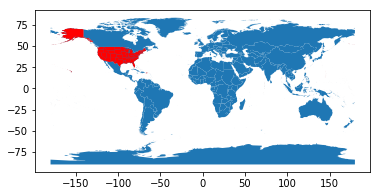

In [154]:
countriesshp = gpd.GeoDataFrame.from_file("TM_WORLD_BORDERS_SIMPL-0.3.shp")
ax = countriesshp.plot()
statetsshp = gpd.GeoDataFrame.from_file("cb_2016_us_state_500k.shp")
statetsshp.plot(ax=ax, color='red')


In [155]:
statetsshp.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [156]:
countriesshp["NAME"][["United" in cn for cn in  countriesshp["NAME"].values]]

150    United States Minor Outlying Islands
204             United Republic of Tanzania
206                          United Kingdom
208                           United States
216            United States Virgin Islands
227                    United Arab Emirates
Name: NAME, dtype: object

In [157]:
dfgroup = df_.drop_duplicates("Email").\
    groupby("state5").count()[["Last Name"]].\
    rename(columns={"Last Name":"count"})

In [158]:
dfgroup.head()

,count
state5,
Arizona,45
Australia,8
Austrtalia,1
Brasil,10
California,132


In [159]:
countriesshp.merge(dfgroup, right_index=True, left_on="NAME")["count"].describe()

count    17.000000
mean     11.235294
std      19.292257
min       1.000000
25%       2.000000
50%       3.000000
75%       7.000000
max      62.000000
Name: count, dtype: float64

In [160]:
statetsshp.NAME

0                                          Alabama
1                                           Alaska
2                                          Arizona
3                                         Arkansas
4                                       California
5                                         Colorado
6                                      Connecticut
7                                         Delaware
8                             District of Columbia
9                                          Georgia
10                                          Hawaii
11                                           Idaho
12                                        Illinois
13                                         Indiana
14                                            Iowa
15                                          Kansas
16                                        Maryland
17                                       Minnesota
18                                     Mississippi
19                             

In [161]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")["count"].describe()

count     33.000000
mean      13.969697
std       25.121561
min        1.000000
25%        2.000000
50%        6.000000
75%       12.000000
max      132.000000
Name: count, dtype: float64

In [162]:
df_.state5[[v  == "UK" for v in df_.state5.values]] = "United Kingdom"

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
df_.state5[[v  == "United Kingdom" for v in df_.state5.values]]
df_.state5[[v  == "DC" for v in df_.state5.values]]

53     DC
256    DC
258    DC
348    DC
394    DC
471    DC
653    DC
745    DC
767    DC
832    DC
Name: state5, dtype: object

In [164]:
df_.state5[[v  == "DC" for v in df_.state5.values]] = "Maryland"

/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [165]:
dfgroup = df_.drop_duplicates("Email").\
    groupby("state5").count()[["Last Name"]].\
    rename(columns={"Last Name":"count"})

In [166]:
dfgroup.sort_values("count")

,count
state5,
Wyoming,1
Ireland,1
Kentucky,1
Minnesota,1
Missouri,1
Delaware,1
Danmark,1
Nebraska,1
New Mexico,1


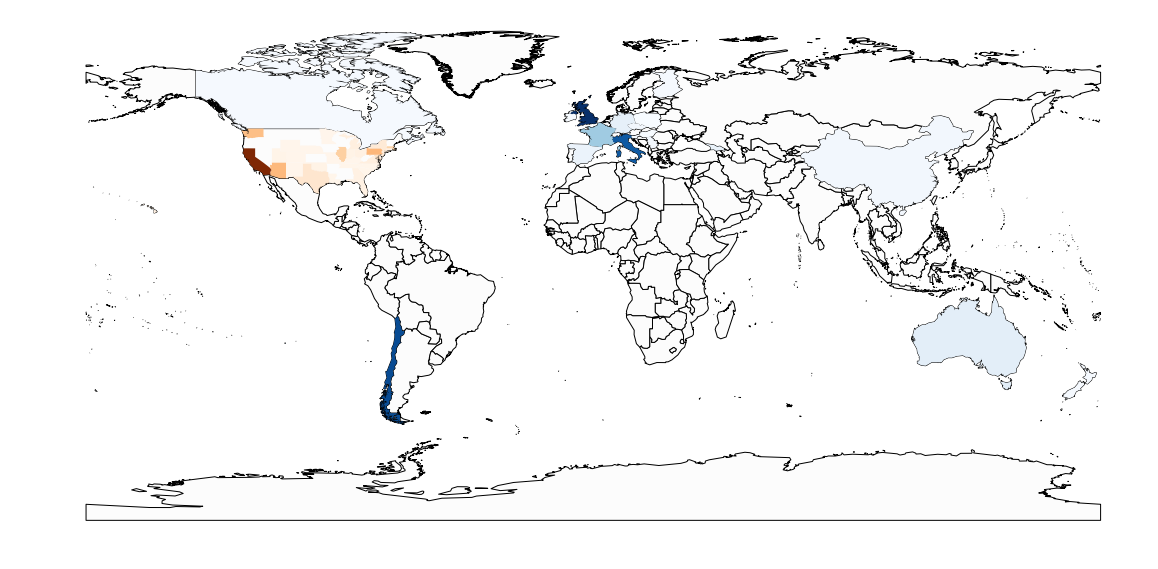

In [167]:
ax = countriesshp.plot(color="#fcfcfc", edgecolor="k", figsize=(20,20))
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Oranges", 
                                                    column="count", ax=ax)
ax.axis('off')
pl.savefig("SCmap.png")


In [168]:
countriesshp["centers"] = countriesshp.geometry.centroid
statetsshp["centers"] = statetsshp.geometry.centroid
allgeos = pd.concat([countriesshp[["NAME", "centers"]], statetsshp[["NAME", "centers"]]]).reset_index()

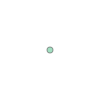

In [169]:
allgeos['centers'].values[0]

In [170]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME",'count']]

,NAME,count
2,Arizona,45
4,California,132
5,Colorado,1
6,Connecticut,7
7,Delaware,1
9,Georgia,6
10,Hawaii,7
12,Illinois,34
13,Indiana,4
16,Maryland,21


In [171]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME",'count']]

,NAME,count
2,Arizona,45
4,California,132
5,Colorado,1
6,Connecticut,7
7,Delaware,1
9,Georgia,6
10,Hawaii,7
12,Illinois,34
13,Indiana,4
16,Maryland,21


In [172]:
pd.options.display.max_rows = 999

In [173]:
countriesshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME", "count"]]

,NAME,count
8,Australia,8
23,Canada,2
29,China,3
32,Chile,62
50,Ireland,1
57,Czech Republic,3
59,Finland,2
64,France,26
67,Georgia,6
71,Germany,7


In [174]:
allcontacts = pd.read_csv("contactdbexport.csv")
allcontacts["Company"].unique()

array(['Lawrence Livermore National Laboratory',
       'NASA Johnson Space Center', 'University of Washington', nan,
       'Columbia University', 'IAC', 'University of California',
       ' Berkeley/ LBNL',
       'Kavli Institute for Particle Astrophysics and Cosmology (KIPAC)',
       'SLAC National Accelerator Laboratory',
       'University of Southampton', 'University of Oxford',
       'Universidad de Antofagasta', ' Davis', 'Universidad Andres Bello',
       'Univ. Paris-Sud & LAL - IN2P3/CNRS', 'IN2P3-LPNHE',
       'INAF-Osservatorio Astronomico di Roma',
       'Universidad Diego Portales', 'LCOGT & UC Santa Barbara',
       'Jet Propulsion Laboratory', 'IPAC/Caltech',
       'The University of Arizona', 'APC', 'University of Chicago',
       'Rutgers',
       'Laboratory for Atmosphere and Space Physics University of Colorado at Boulder',
       'Pennsylvania State University',
       'Lawrence Berkeley National Laboratory', 'Yale University',
       'Georgia Institute of 

In [175]:
df_.head()

,Unnamed: 0,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,SC,state,state1,state2,state3,state4,state5
0,0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member,Transients,Lawrence Livermore National Laboratory,California,NaN,California,California,California
1,1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member,Solar System,NASA Johnson Space Center,California,NaN,California,NaN,California
2,2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,Transients,Washington,Washington,NaN,Washington,Washington,Washington
3,4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member,DESC,NaN,NaN,Brasil,Brasil,NaN,Brasil
4,5,Marcel,Agueros,marcel@astro.columbia.edu,212-854-6814,Columbia University,Transients,Member,Transients,Columbia University,New York,NaN,New York,New York,New York


In [176]:
pd.read_csv("tblinstitutionalmembers (1).csv")

FileNotFoundError: [Errno 2] File b'tblinstitutionalmembers (1).csv' does not exist: b'tblinstitutionalmembers (1).csv'

In [177]:
df_.head()

,Unnamed: 0,First Name,Last Name,Email,Telephone,Company,Contact Category,Role,SC,state,state1,state2,state3,state4,state5
0,0,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member,Transients,Lawrence Livermore National Laboratory,California,NaN,California,California,California
1,1,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member,Solar System,NASA Johnson Space Center,California,NaN,California,NaN,California
2,2,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Transients,Member,Transients,Washington,Washington,NaN,Washington,Washington,Washington
3,4,Michel,Aguena,aguena@if.usp.br,NaN,NaN,DESC,Member,DESC,NaN,NaN,Brasil,Brasil,NaN,Brasil
4,5,Marcel,Agueros,marcel@astro.columbia.edu,212-854-6814,Columbia University,Transients,Member,Transients,Columbia University,New York,NaN,New York,New York,New York


In [178]:
from shapely.geometry import LineString # To create line geometries that can be used in a GeoDataFrame
def makeline(g0, g1):
    #print(g0,g1)
    start, end = [(g0.x, g0.y), (g1.x, g1.y)]
    line = LineString([start, end]), start, end
    #data = {'geometry': [line]}
    #return gpd.GeoDataFrame(pd.DataFrame(data, 
           #                                 columns = ['geometry'])) 
    return line

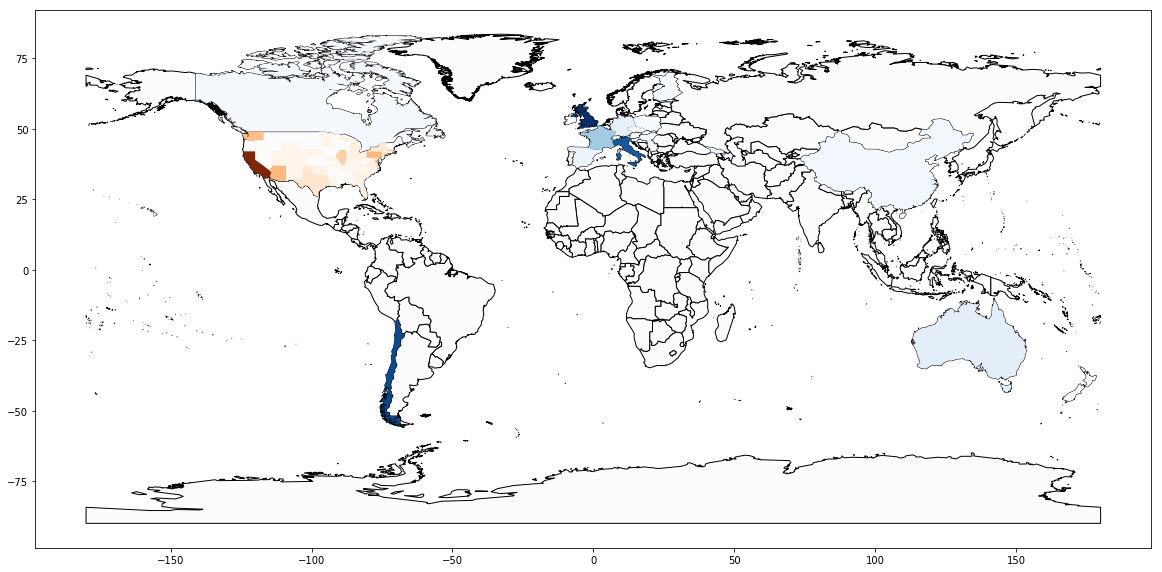

In [179]:
ax = countriesshp.plot(color="#fcfcfc", edgecolor="k", figsize=(20,20))
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Oranges", 
                                                    column="count", ax=ax)
#ax.axis('off')
g0, g1 = countriesshp[countriesshp["NAME"] == "Brazil"]["geometry"].centroid.values[0],\
countriesshp[countriesshp["NAME"] == "Italy"]["geometry"].centroid.values[0]
#makeline(g0, g1).plot(ax=ax)
#pl.plot(countriesshp['centers'][0], countriesshp['centers'][1])
#countriesshp.head(), countriesshp['centers'][0], countriesshp['centers'][1]

In [180]:
def getlinks(pairs):
    #print(allgeos["centers"][allgeos["NAME"] == pairs[0]].values[0], 
    #      allgeos["centers"][allgeos["NAME"] == pairs[1]].values[0])
    #print((allgeos["NAME"] == pairs[0]).sum())
    #print((allgeos["NAME"] == pairs[1]).sum())
    return allgeos["centers"][allgeos["NAME"] == pairs[0]].values[0], \
allgeos["centers"][allgeos["NAME"] == pairs[1]].values[0]


def pairup(mylist):
    pairs = []
    for i,l1 in enumerate(mylist):
        for l2 in mylist[i+1:]:
            if (l1 in allgeos["NAME"].values and l2 in allgeos["NAME"].values):
                #print(l1, l2)
                pairs.append((l1, l2))
    pairs, k = np.unique(np.array(pairs), axis=0, return_counts=1)
    #print(pairs)#print([(p[0], p[1]) for p in pairs])
    return [getlinks((p[0], p[1])) for p in pairs], k




In [181]:
getlinks(("Alabama", "California"))

(<shapely.geometry.point.Point at 0x1307fc828>,
 <shapely.geometry.point.Point at 0x130844978>)

In [182]:
df_["SC"].unique()

array(['Transients', 'Solar System', 'DESC', 'Galaxies', 'Strong Lensing',
       'AGN', 'Stars, Milky Way, and Local Volume',
       'Statistics and Informatics'], dtype=object)

In [183]:
pairs = {}
for sc in df_["SC"].unique():
    pairs[sc] = []
    pairs[sc] = pairup(df_[df_.SC == sc]["state5"].values)
    

In [184]:
pairs.keys()

dict_keys(['Transients', 'Solar System', 'DESC', 'Galaxies', 'Strong Lensing', 'AGN', 'Stars, Milky Way, and Local Volume', 'Statistics and Informatics'])

Transients
Solar System
DESC
Galaxies
Strong Lensing
AGN
Stars, Milky Way, and Local Volume
Statistics and Informatics


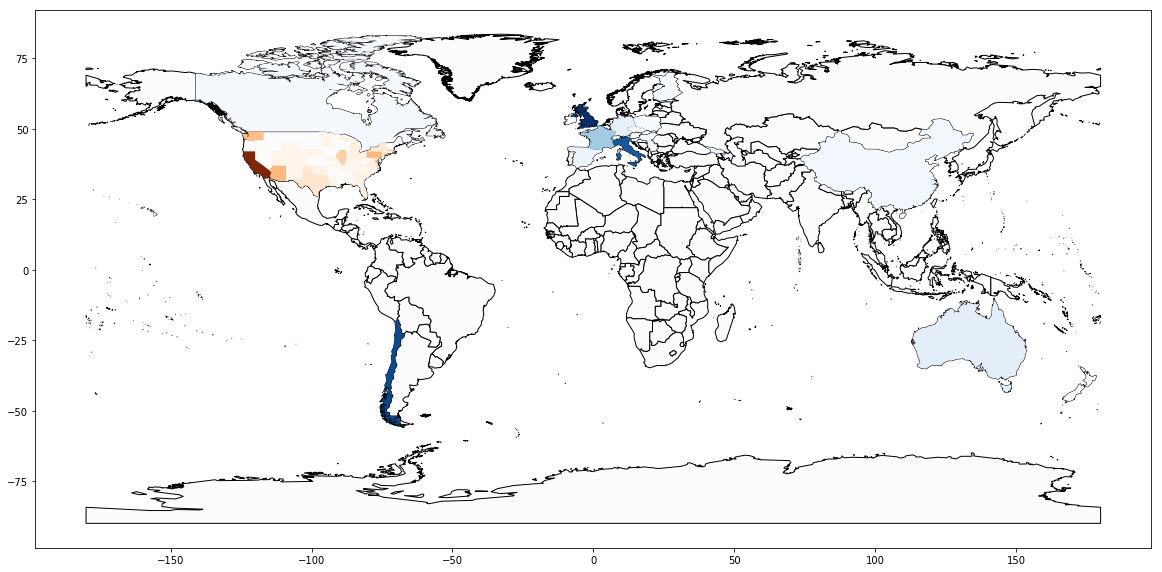

In [185]:
ax = pl.figure(figsize=(20,20)).add_subplot(111)
countriesshp.plot(color="#fcfcfc", edgecolor="k", ax=ax)
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Oranges", 
                                                    column="count", ax=ax)
colors = ['k', 'c', 'm', 'y', 'g', 'b', 'r']
for i,k in enumerate(pairs.keys()):
    print(k)
    for j,p in enumerate(pairs[k][0]):
        #print(p)
        try:
            makeline(p[0], p[1]).plot(ax=ax, alpha=0.01 * pairs[k][1][j], 
                                      color=colors[i])
        except:
            pass
pl.savefig("mapWnetwork.png")


In [186]:
def plot_line(ax, ob, alpha, color):
    x, y = ob.xy
    #print(color, alpha)
    ax.annotate("",
                xy=(x[0],y[0]), xycoords='data',
                xytext=(x[1],y[1]), textcoords='data',
                arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3,rad=0.3",
                               ec=color, alpha=alpha),
                #color=color, alpha=alpha
                )
    
    #ax.plot(x, y, color=color, alpha=0.7, linewidth=1, solid_capstyle='round', zorder=2)

In [187]:
pairslist[pairsort]

NameError: name 'pairslist' is not defined

In [ ]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

fig, ax = pl.subplots(nrows=1, ncols=1,figsize=(20,10))
countriesshp.plot(color="#fcfcfc", edgecolor="k", ax=ax)
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="gray_r",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="gray", 
                                                    column="count", ax=ax)
colors = {"Transients":"#44aa99", 'Solar System':"#332288", 
          'Strong Lensing':"#117733", 'DESC':"#cc6677", 
          'Galaxies':"#999933", 'AGN':"#882255", 
          'Stars, Milky Way, and Local Volume':"#88ccee", 
          'Statistics and Informatics':"#aa4499"}
pairslist = np.array(list(list(pairs.keys())))
pairsort = np.argsort([len(pairs[k][1]) 
                       for k in list(pairs.keys())])[::-1]
                    
l = 7
for i,k in enumerate(pairslist[pairsort]):
    print(k, len(pairs[k][1]))
    for j,p in enumerate(pairs[k][0]):
        #print(p, makeline(p[0], p[1])[0], 0.01 * pairs[k][1][j])
        if 1: #
        #try:
            #print(0.01 * pairs[k][1][j])
            #makeline(p[0], p[1]).plot(ax=ax, alpha=0.01 * pairs[k][1][j], 
            #                          color=colors[i])
            #print(makeline(p[0], p[1]))
            #pl.plot(makeline(p[0], p[1])[2], makeline(p[0], p[1])[1], alpha=0.01 * pairs[k][1][j], 
            #                          color=colors[i])
            alpha = 0.03 * pairs[k][1][j]
            #print(alpha)
            if k == "Stars, Milky Way, and Local Volume":
                alpha = alpha * 0.3
            alpha=max(0.02, min(1, alpha))
            plot_line(ax, makeline(p[0], p[1])[0], alpha=alpha, 
                                      color=colors[k])
            #print(makeline(p[0],p[1])[0])
            #makeline(p[0], p[1])[0]#.plot(ax=ax)
        #except:
        #    pass
    pl.plot(-180, -10*i, 'o', ms=10, color=colors[k])
    pl.text(-175, -10*i, k.replace("Stars, Milky Way, and Local Volume", 
                                  "SMWLV"), ha="left", va="center", fontsize=20)
    #break
ax.axis('off');
pl.savefig("SCmapWNet.png")


In [ ]:
#statetsshp.merge(dfgroup, right_index=True, left_on="NAME").head()
dfgroup2 = dfgroup.copy()
dfgroup2["state6"] = dfgroup2.index
dfgroup2 = dfgroup2.reset_index().set_index(["state5"])["state6"].repeat(dfgroup['count']).reset_index()#

In [188]:
dfgroup2

NameError: name 'dfgroup2' is not defined

In [189]:
statetsshp.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,centers
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.053375 30.506987, -88.051087999...",POINT (-86.82836708683581 32.78982605295459)
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",POINT (-152.2210020789688 64.21750321400454)
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.816294 32.508038, -114.814321 3...",POINT (-111.6644073327169 34.29310461672169)
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.6178329666013 36.4994141203285, ...",POINT (-92.43926114251903 34.89973899666969)
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",POINT (-119.610686234632 37.24606557573667)


In [190]:
def tr(x):
    return x.coords.xy[0][0]#, x.centers.coords.xy[1][0]
def tr1(x):
    return x.coords.xy[1][0]#, x.centers.coords.xy[1][0]
statetsshp["coords0"] = statetsshp["centers"].transform(tr)
statetsshp["coords1"] = statetsshp["centers"].transform(tr1)
    

In [191]:
dfnow = statetsshp.merge(dfgroup2, right_on="state5", left_on="NAME")[["coords0", "coords1"]]#.plot(cmap="gray", 
                                                    #column="count", ax=ax)


NameError: name 'dfgroup2' is not defined

In [192]:
import datashader as ds
import datashader.transfer_functions as tf
import dask.dataframe as dd
import numpy as np


ModuleNotFoundError: No module named 'datashader'

In [193]:

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container { width:100% !important; }</style>"))

ModuleNotFoundError: No module named 'datashader'

world, USA

In [194]:
world           = ((-180, 180), (-180,  180) )
USA           = ((-124.72,  -66.95), (23.55, 50.06))
background = "gray"
from datashader.utils import lnglat_to_meters as webm
x_range,y_range = [list(r) for r in USA]

plot_width  = int(900)
plot_height = int(plot_width*7.0/12)


ModuleNotFoundError: No module named 'datashader'

In [195]:
cvs = ds.Canvas(plot_width, plot_height, *USA)#*webm(*world))
agg = cvs.points(dfnow, 'coords0', 'coords1')
#dfnow[['coords0', 'coords1']]

NameError: name 'ds' is not defined

In [196]:
agg.data.flatten()[agg.data.flatten()>0]

NameError: name 'agg' is not defined

In [197]:
pl.hist(np.log(agg).data.flatten())

NameError: name 'agg' is not defined

In [198]:
color_key = {'w':'blue', 'b':'green', 'a':'red', 'h':'orange',  'o':'saddlebrown'}
from matplotlib.cm import hot
x_range,y_range=webm(np.array([-180,0]), np.array([-180,180]))
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(dfnow, 'coords0', 'coords1')
agg.data = agg.data+1
export(tf.shade(agg, color_key=color_key, how='eq_hist'), "tmp")
    

NameError: name 'webm' is not defined

In [199]:
tf.shade(np.log(agg), cmap=plt.get_cmap('viridis'), how='linear')

NameError: name 'tf' is not defined

In [200]:
agg.data.sum()

NameError: name 'agg' is not defined

In [201]:
dfnow["coords0"]

NameError: name 'dfnow' is not defined

In [202]:
cvs.points(dfnow, "coords0","coords1", agg=None)

NameError: name 'cvs' is not defined